In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:/Users/korn/Desktop/TNI/Paper/Code/All_Pubg_Tournament_Player.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19189 entries, 0 to 19188
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tournament       19189 non-null  int64  
 1   Source.Name      19189 non-null  object 
 2   DBNOs            19189 non-null  int64  
 3   assists          19189 non-null  int64  
 4   boosts           19189 non-null  int64  
 5   damageDealt      19189 non-null  float64
 6   deathType        19189 non-null  object 
 7   headshotKills    19189 non-null  int64  
 8   heals            19189 non-null  int64  
 9   killPlace        19189 non-null  int64  
 10  killStreaks      19189 non-null  int64  
 11  kills            19189 non-null  int64  
 12  longestKill      19189 non-null  float64
 13  name             19189 non-null  object 
 14  playerId         19189 non-null  object 
 15  revives          19189 non-null  int64  
 16  rideDistance     19189 non-null  float64
 17  roadKills   

In [3]:
## df.drop(['Source.Name', 'game'], axis=1, inplace=True)


In [4]:
df.head()

,Tournament,Source.Name,DBNOs,assists,boosts,damageDealt,deathType,headshotKills,heals,killPlace,...,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace,id,teamId,game,winPlacePer
0,1,JIB PTS 2020 ROAD TO PCS #1 - APAC.csv,5,2,3,424.69205,alive,0,2,1,...,0,1827.099,1,2169.9653,7,1,e95e3c17-6ece-48af-beb7-f9872db115b4,2,1,1.000000
1,1,JIB PTS 2020 ROAD TO PCS #1 - APAC.csv,2,4,4,410.75656,alive,1,3,2,...,0,1827.099,1,2237.6655,4,1,3ecdc73c-528a-4e9c-88b0-fd36a3bcee58,2,1,1.000000
2,1,JIB PTS 2020 ROAD TO PCS #1 - APAC.csv,0,6,4,500.23737,alive,0,1,3,...,0,1827.099,1,2954.6726,4,1,8440e416-f146-4974-8480-b1a359a3ee00,2,1,1.000000
3,1,JIB PTS 2020 ROAD TO PCS #1 - APAC.csv,2,2,2,481.67996,alive,0,1,5,...,0,1827.099,0,2176.8606,5,1,c1a83909-3974-4c15-a3e1-ca45c26bdd52,2,1,1.000000
4,1,JIB PTS 2020 ROAD TO PCS #1 - APAC.csv,0,0,7,328.17040,byplayer,2,7,6,...,0,1827.060,0,1284.1807,6,2,b075f53b-61e7-49e3-a251-7579aa82da28,10,1,0.933333


In [5]:
print("The average kills {:.4f} players, 99% of people have {} kills or less, most kills ever recorded is {}.".format(df['kills'].mean(),df['kills'].quantile(0.99), df['kills'].max()))

The average kills 0.9183 players, 99% of people have 5.0 kills or less, most kills ever recorded is 12.


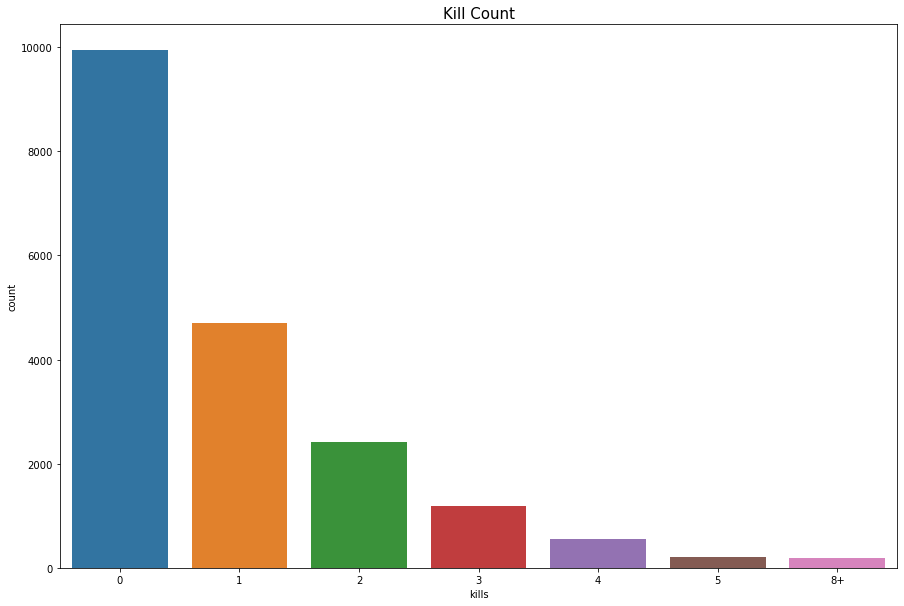

In [6]:
data = df.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

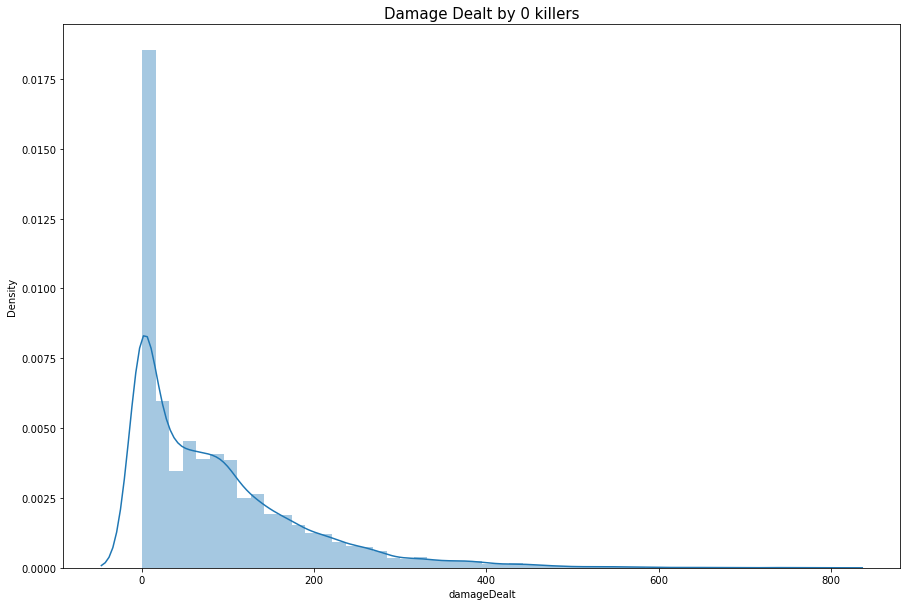

In [7]:
data = df.copy()
data = data[data['kills']==0]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

In [8]:
print("{} players ({:.4f}%) have won without a single kill!".format(len(data[data['winPlacePer']==1]), 100*len(data[data['winPlacePer']==1])/len(df)))

data1 = df[df['damageDealt'] == 0].copy()
print("{} players ({:.4f}%) have won without dealing damage!".format(len(data1[data1['winPlacePer']==1]), 100*len(data1[data1['winPlacePer']==1])/len(df)))

153 players (0.7973%) have won without a single kill!
26 players (0.1355%) have won without dealing damage!


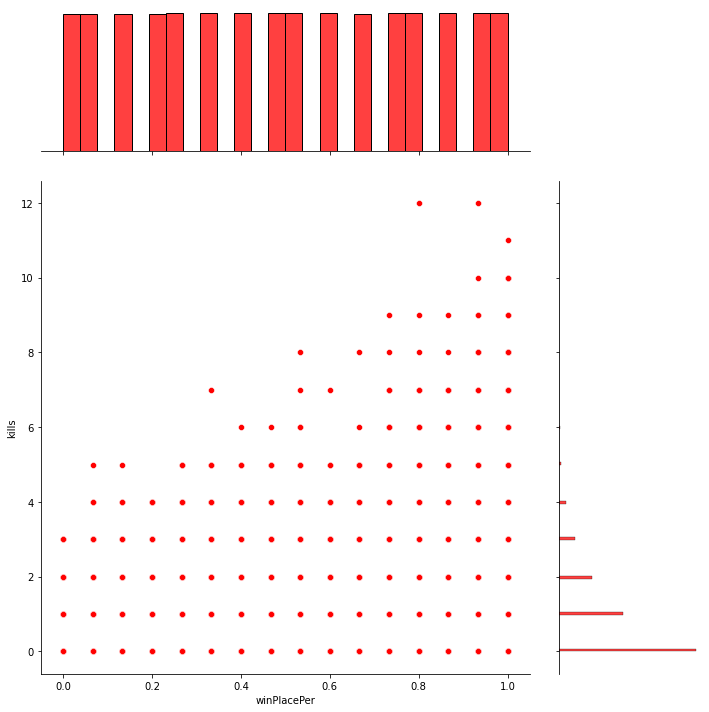

In [9]:
sns.jointplot(x="winPlacePer", y="kills", data=df, height=10, ratio=3, color="r")
plt.show()

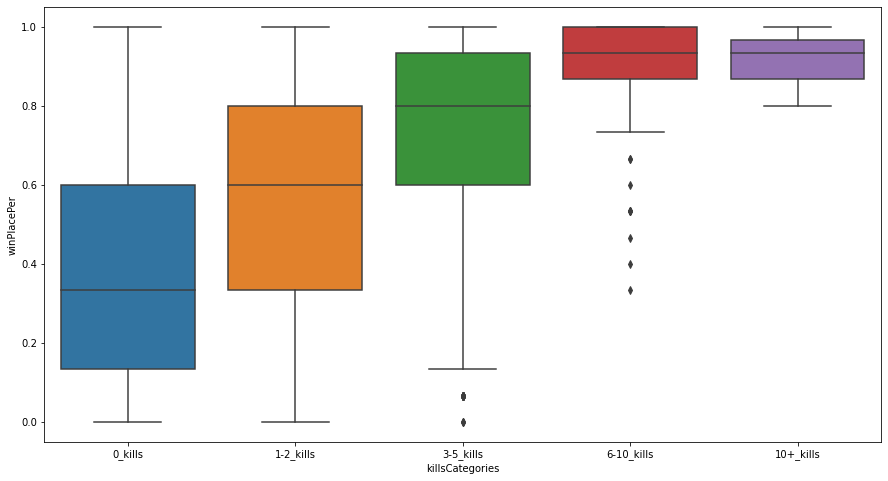

In [10]:
kills = df.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePer", data=kills)
plt.show()

In [11]:
print("The average person walks for {:.1f}m, 99% of people have walked {}m or less, while the marathoner champion walked for {}m.".format(df['walkDistance'].mean(), df['walkDistance'].quantile(0.99), df['walkDistance'].max()))

The average person walks for 1283.5m, 99% of people have walked 3088.9655279999974m or less, while the marathoner champion walked for 8731.443000000001m.


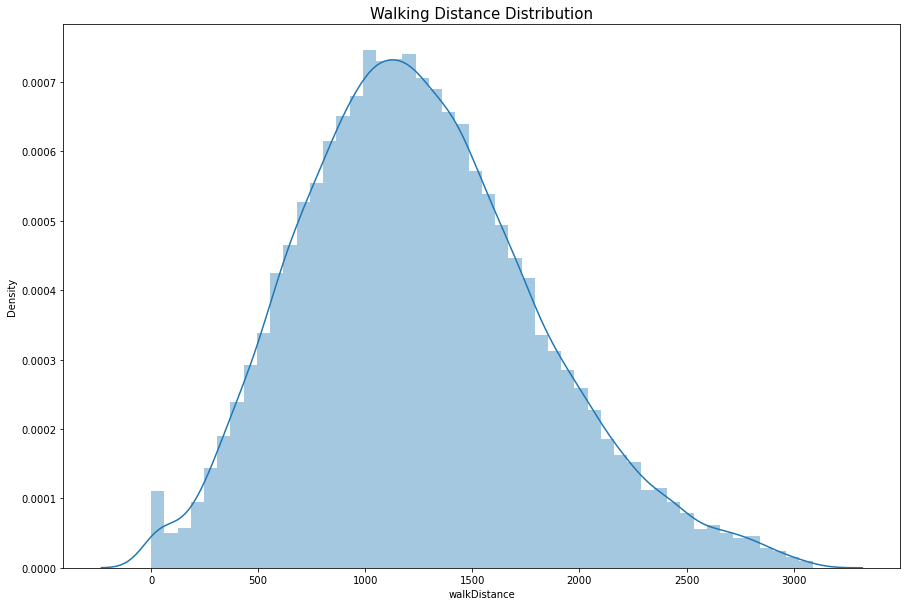

In [12]:
data = df.copy()
data = data[data['walkDistance'] < df['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

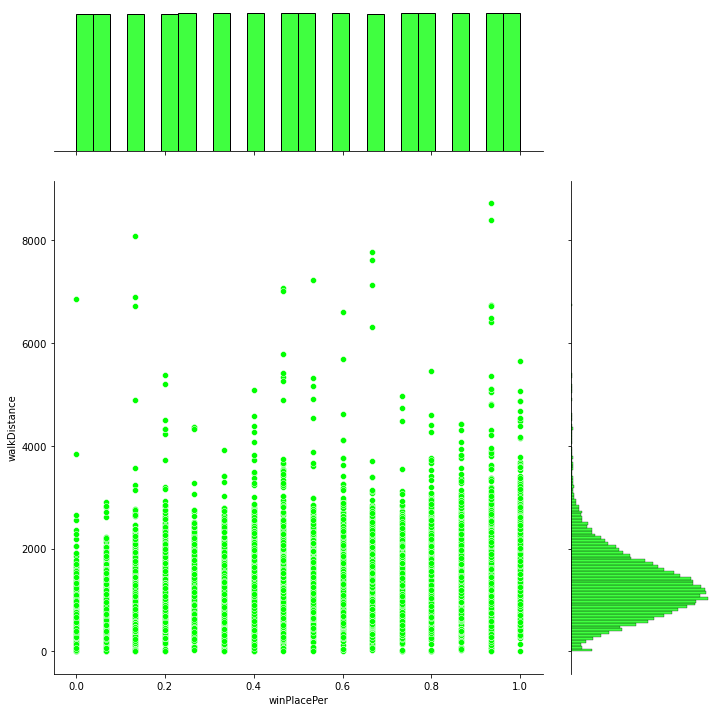

In [13]:
sns.jointplot(x="winPlacePer", y="walkDistance",  data=df, height=10, ratio=3, color="lime")
plt.show()

In [14]:
print("The average person drives for {:.1f}m, 99% of people have drived {}m or less, while the formula 1 champion drived for {}m.".format(df['rideDistance'].mean(), df['rideDistance'].quantile(0.99), df['rideDistance'].max()))

The average person drives for 4213.8m, 99% of people have drived 11019.259439999998m or less, while the formula 1 champion drived for 14402.441m.


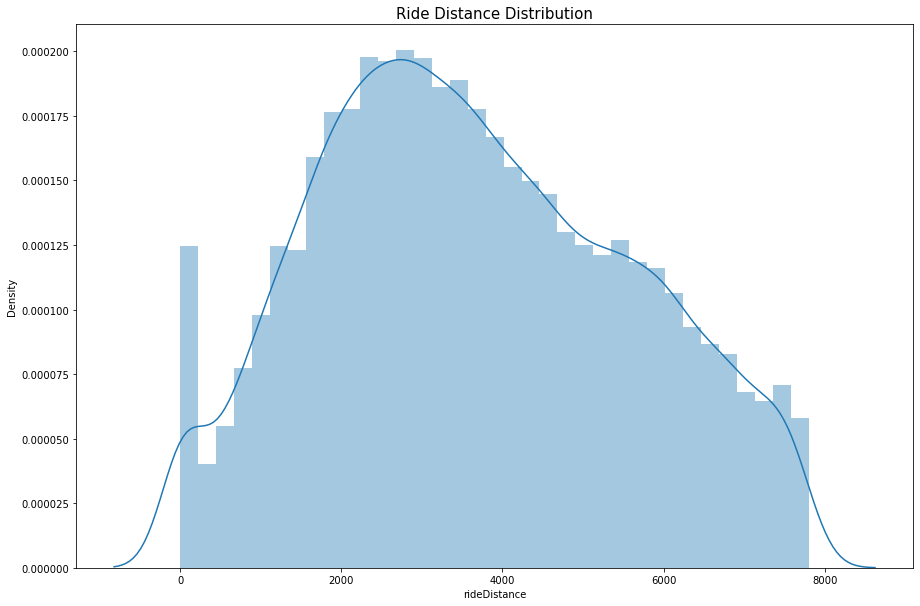

In [15]:
data = df.copy()
data = data[data['rideDistance'] < df['rideDistance'].quantile(0.9)]
plt.figure(figsize=(15,10))
plt.title("Ride Distance Distribution",fontsize=15)
sns.distplot(data['rideDistance'])
plt.show()

In [16]:
print("{} players ({:.4f}%) drived for 0 meters.".format(len(data[data['rideDistance'] == 0]), 100*len(data1[data1['rideDistance']==0])/len(df)))

363 players (0.6045%) drived for 0 meters.


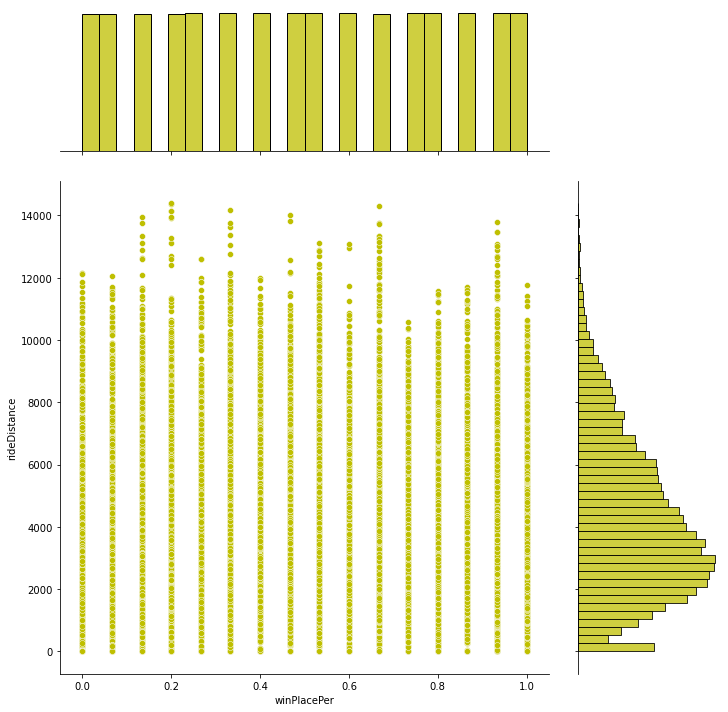

In [17]:
sns.jointplot(x="winPlacePer", y="rideDistance", data=df, height=10, ratio=3, color="y")
plt.show()

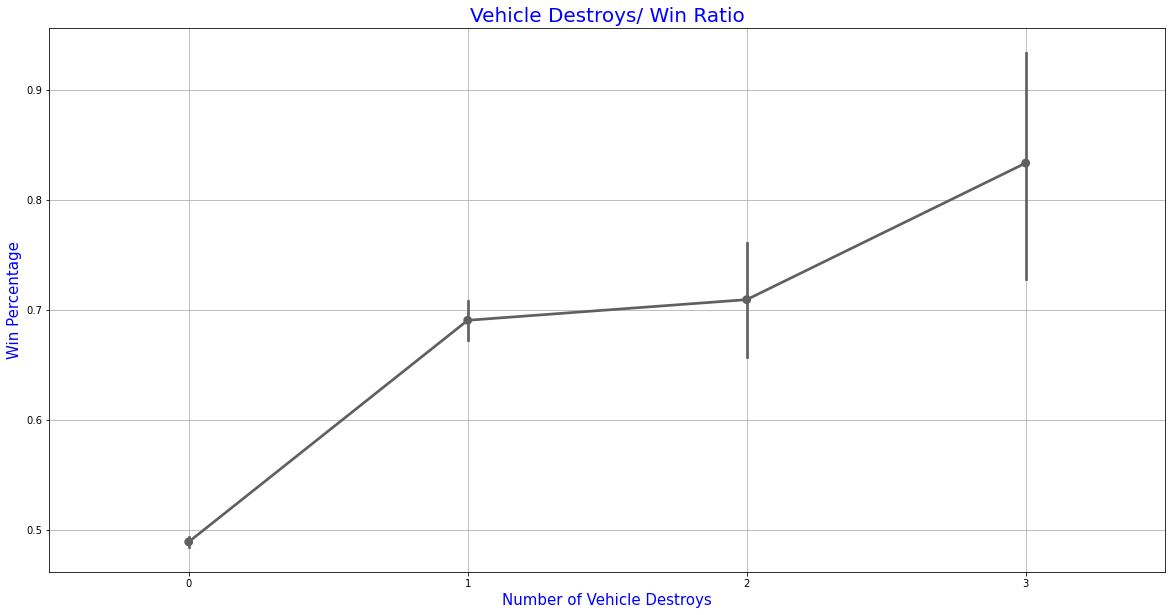

In [18]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePer',data=data,color='#606060',alpha=0.8)
plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [19]:
print("The average person swims for {:.1f}m, 99% of people have swimemd {}m or less, while the olympic champion swimmed for {}m.".format(df['swimDistance'].mean(), df['swimDistance'].quantile(0.99), df['swimDistance'].max()))

The average person swims for 3.6m, 99% of people have swimemd 75.33569879999962m or less, while the olympic champion swimmed for 3259.3313m.


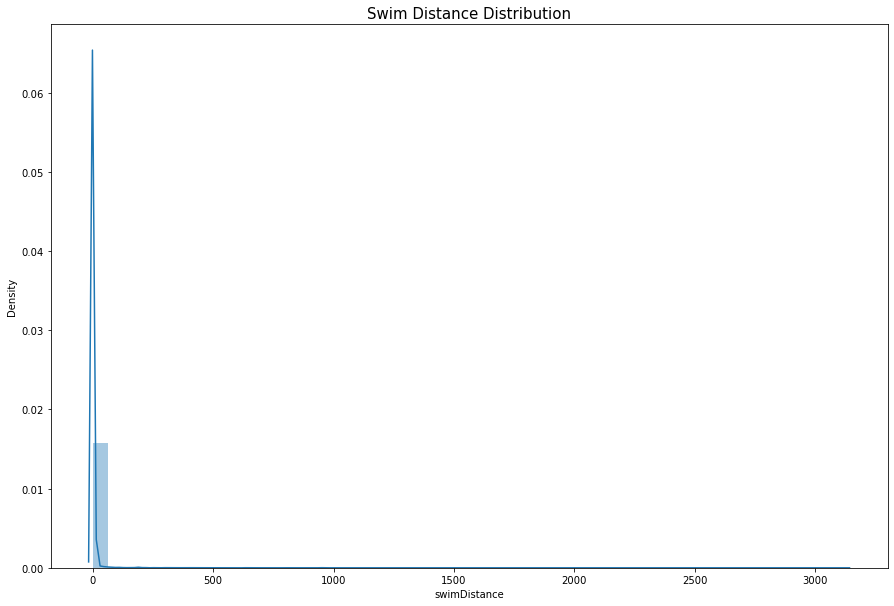

In [20]:
data = df.copy()
data = data[data['swimDistance'] < df['swimDistance'].quantile(1)]
plt.figure(figsize=(15,10))
plt.title("Swim Distance Distribution",fontsize=15)
sns.distplot(data['swimDistance'])
plt.show()

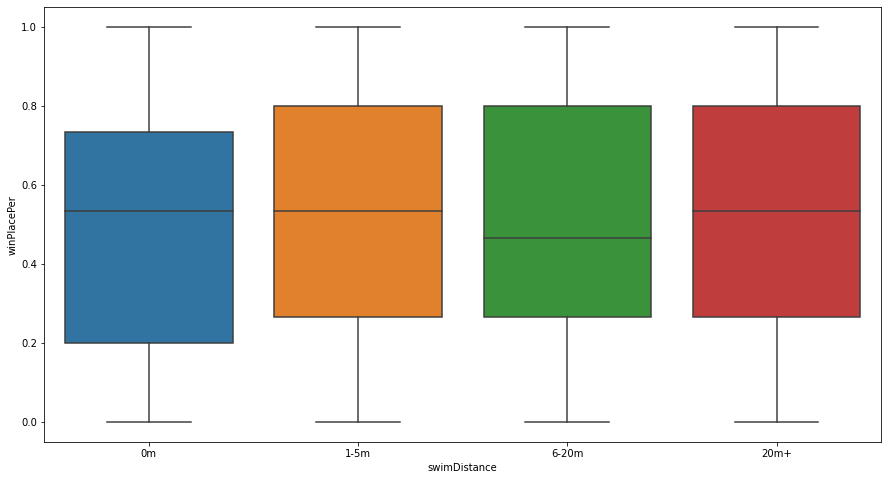

In [21]:
swim = df.copy()

swim['swimDistance'] = pd.cut(swim['swimDistance'], [-1, 0, 5, 20, 5286], labels=['0m','1-5m', '6-20m', '20m+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="swimDistance", y="winPlacePer", data=swim)
plt.show()

In [22]:
print("The average person uses {:.1f} heal items, 99% of people use {} or less, while the doctor used {}.".format(df['heals'].mean(), df['heals'].quantile(0.99), df['heals'].max()))
print("The average person uses {:.1f} boost items, 99% of people use {} or less, while the doctor used {}.".format(df['boosts'].mean(), df['boosts'].quantile(0.99), df['boosts'].max()))

The average person uses 2.4 heal items, 99% of people use 14.0 or less, while the doctor used 38.
The average person uses 3.1 boost items, 99% of people use 9.0 or less, while the doctor used 15.


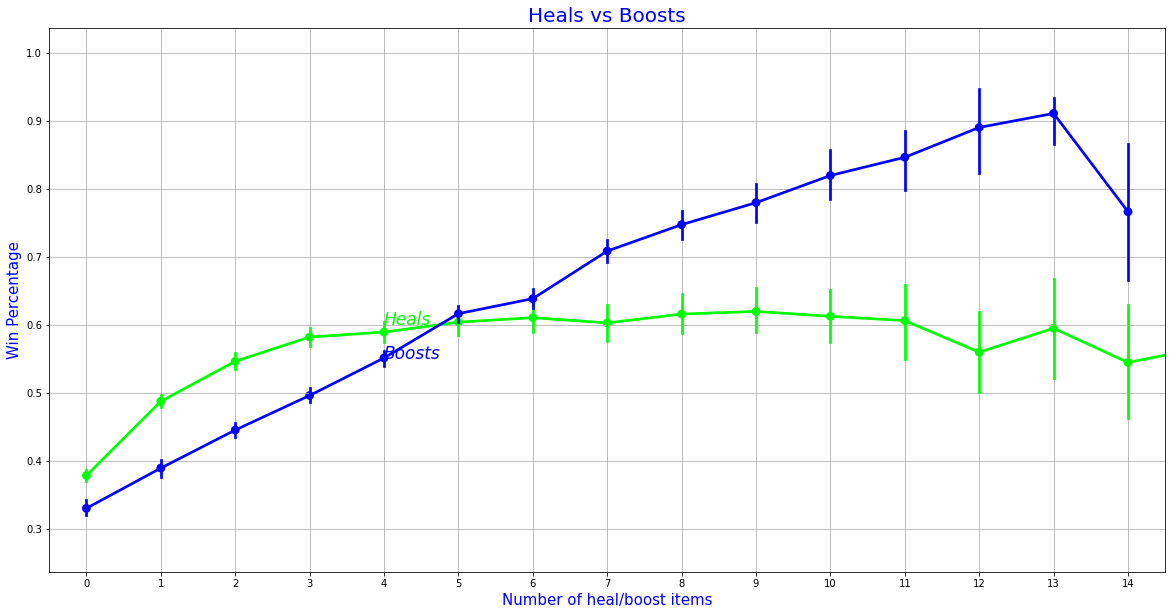

In [23]:
data = df.copy()
data = data[data['heals'] < data['heals'].quantile(1)]
data = data[data['boosts'] < data['boosts'].quantile(1)]

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePer',data=data,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePer',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

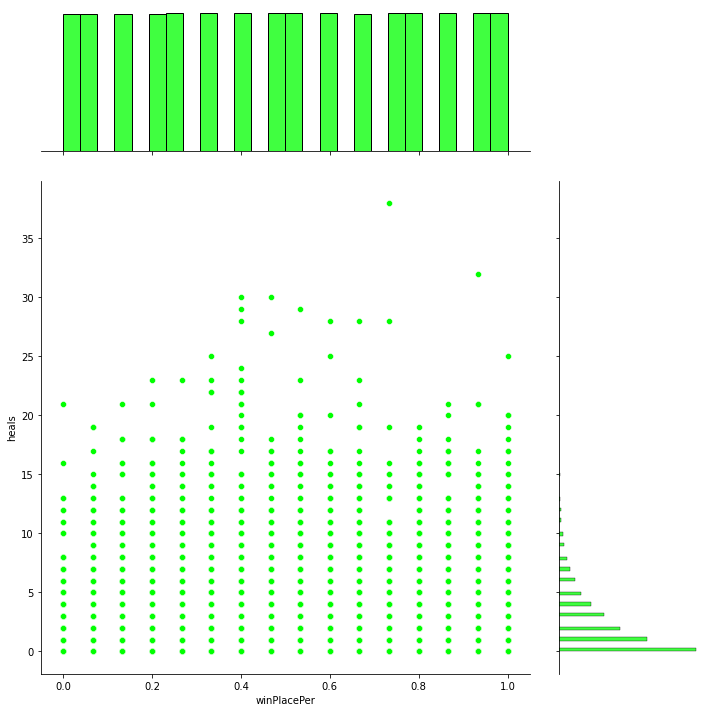

In [24]:
sns.jointplot(x="winPlacePer", y="heals", data=df, height=10, ratio=3, color="lime")
plt.show()

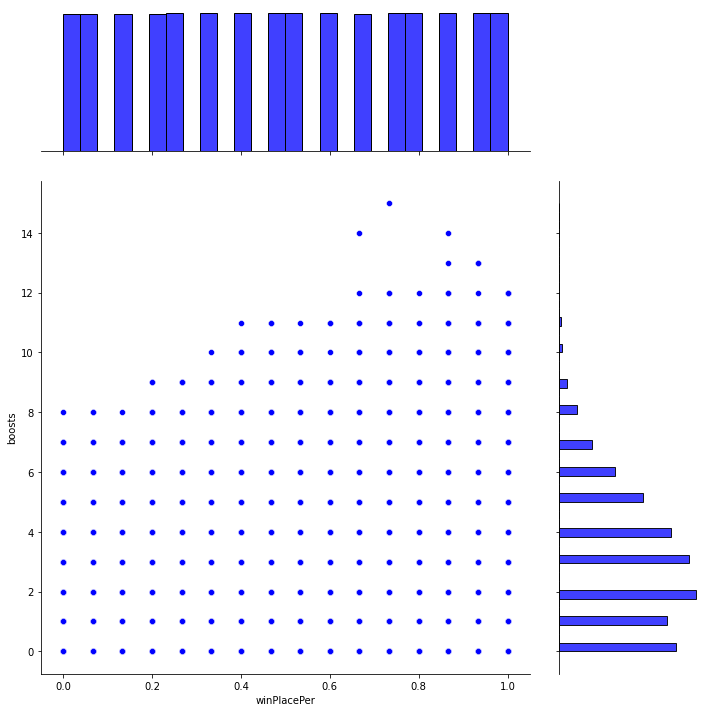

In [25]:
sns.jointplot(x="winPlacePer", y="boosts", data=df, height=10, ratio=3, color="blue")
plt.show()

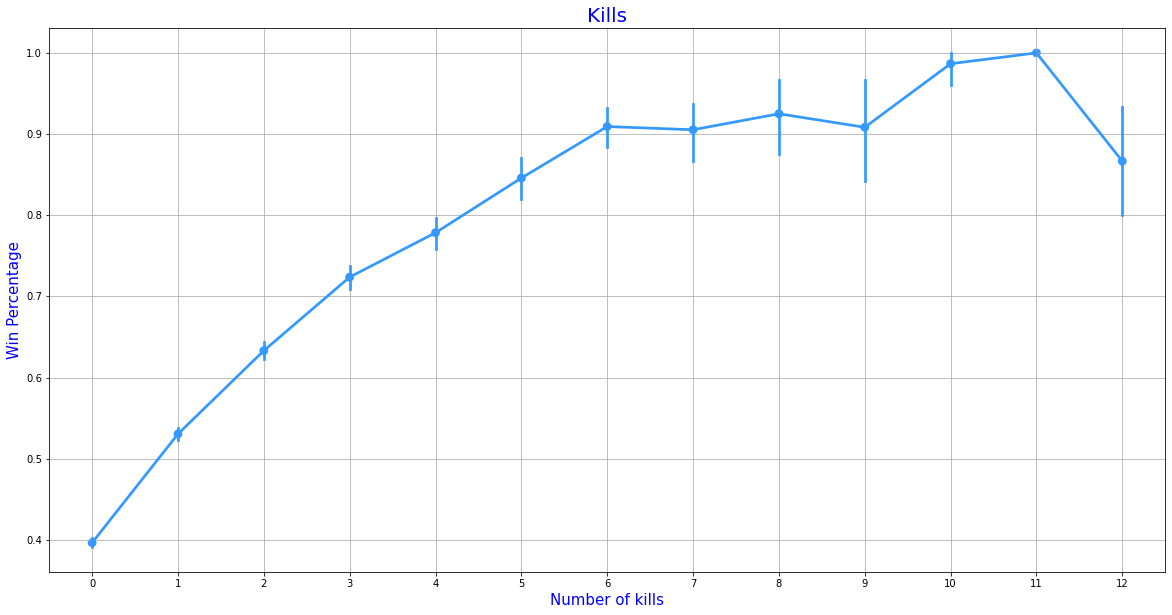

In [26]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePer',data=df, color='#3399FF',alpha=0.8)
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Kills',fontsize = 20,color='blue')
plt.grid()
plt.show()




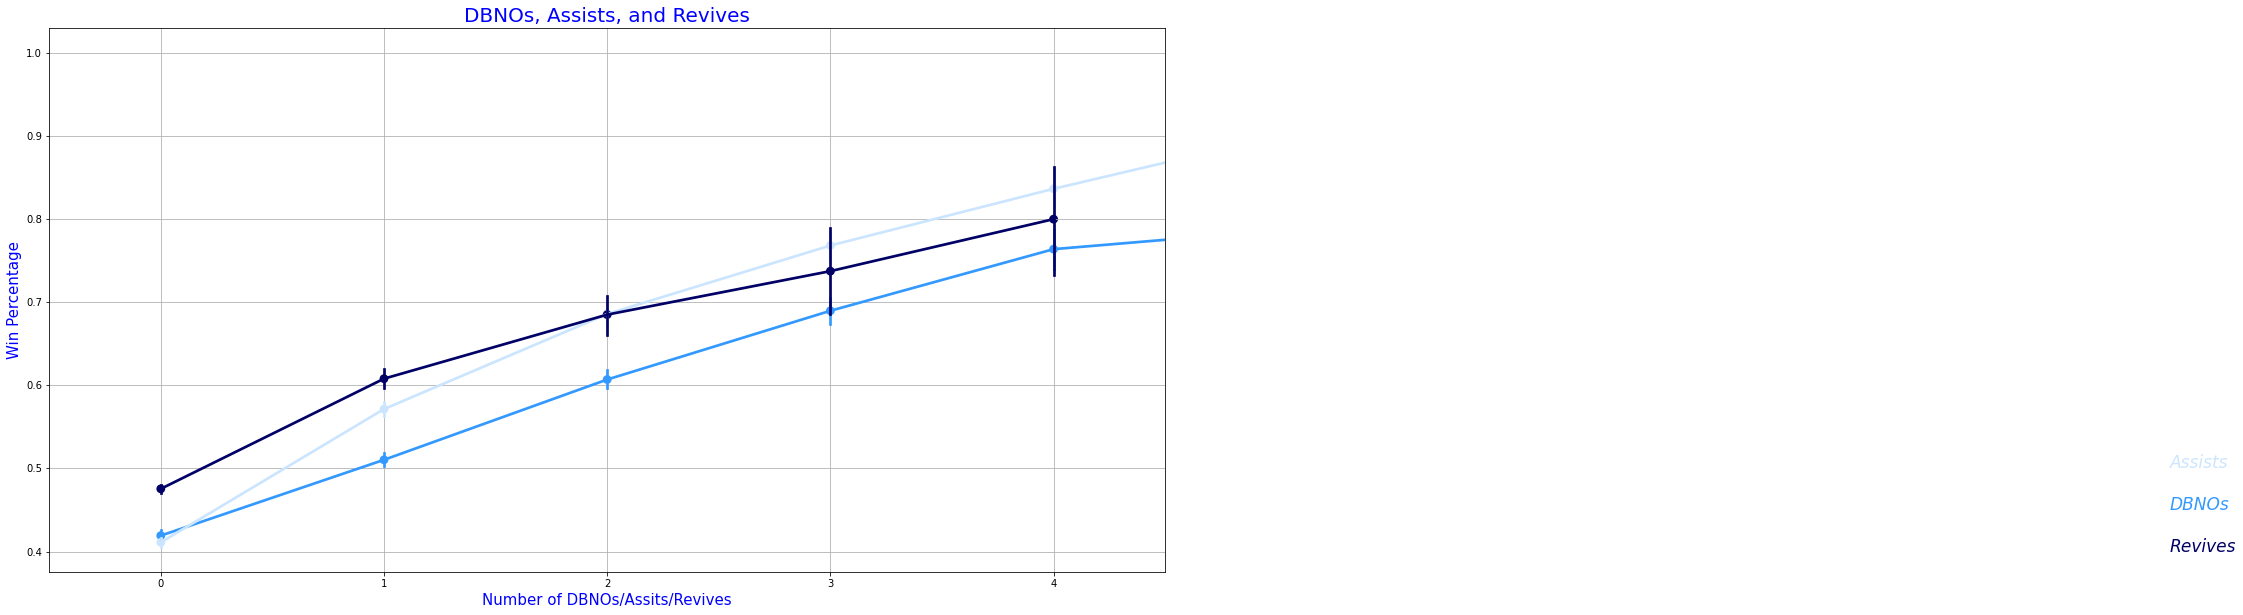

In [27]:
f,ax1 = plt.subplots(figsize =(20,10))

sns.pointplot(x='DBNOs',y='winPlacePer',data=df,color='#3399FF',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePer',data=df,color='#CCE5FF',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePer',data=df,color='#000066',alpha=0.8)
plt.text(9,0.5,'Assists',color='#CCE5FF',fontsize = 17,style = 'italic')
plt.text(9,0.45,'DBNOs',color='#3399FF',fontsize = 17,style = 'italic')
plt.text(9,0.4,'Revives',color='#000066',fontsize = 17,style = 'italic')
plt.xlabel('Number of DBNOs/Assits/Revives',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('DBNOs, Assists, and Revives',fontsize = 20,color='blue')
plt.grid()
plt.show()

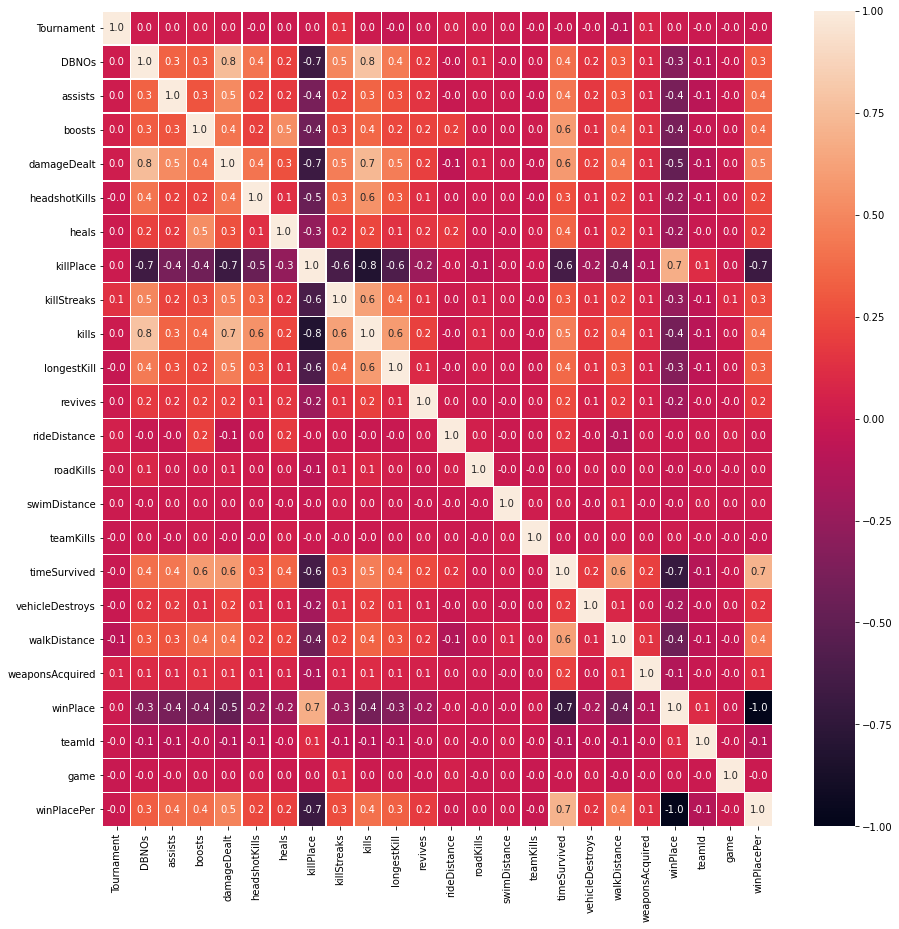

In [28]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

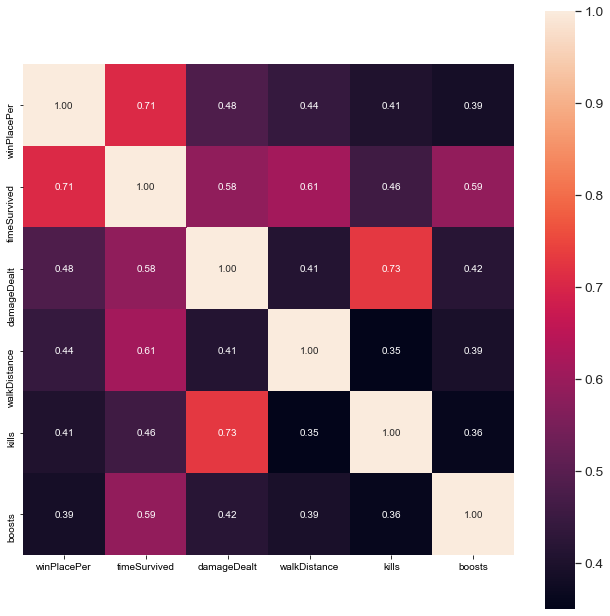

In [29]:
k = 6 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = df.corr().nlargest(k, 'winPlacePer')['winPlacePer'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

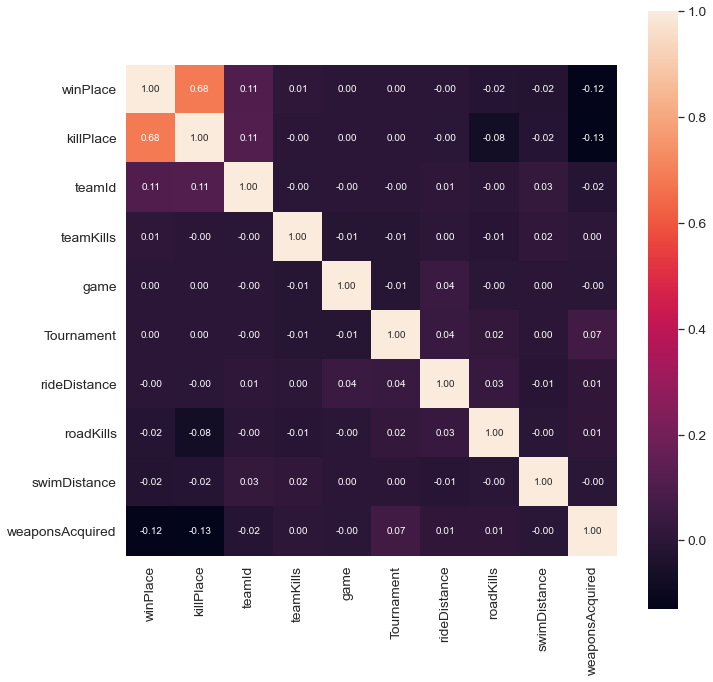

In [30]:
k = 10 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = df.corr().nsmallest(k, 'winPlacePer')['winPlacePer'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

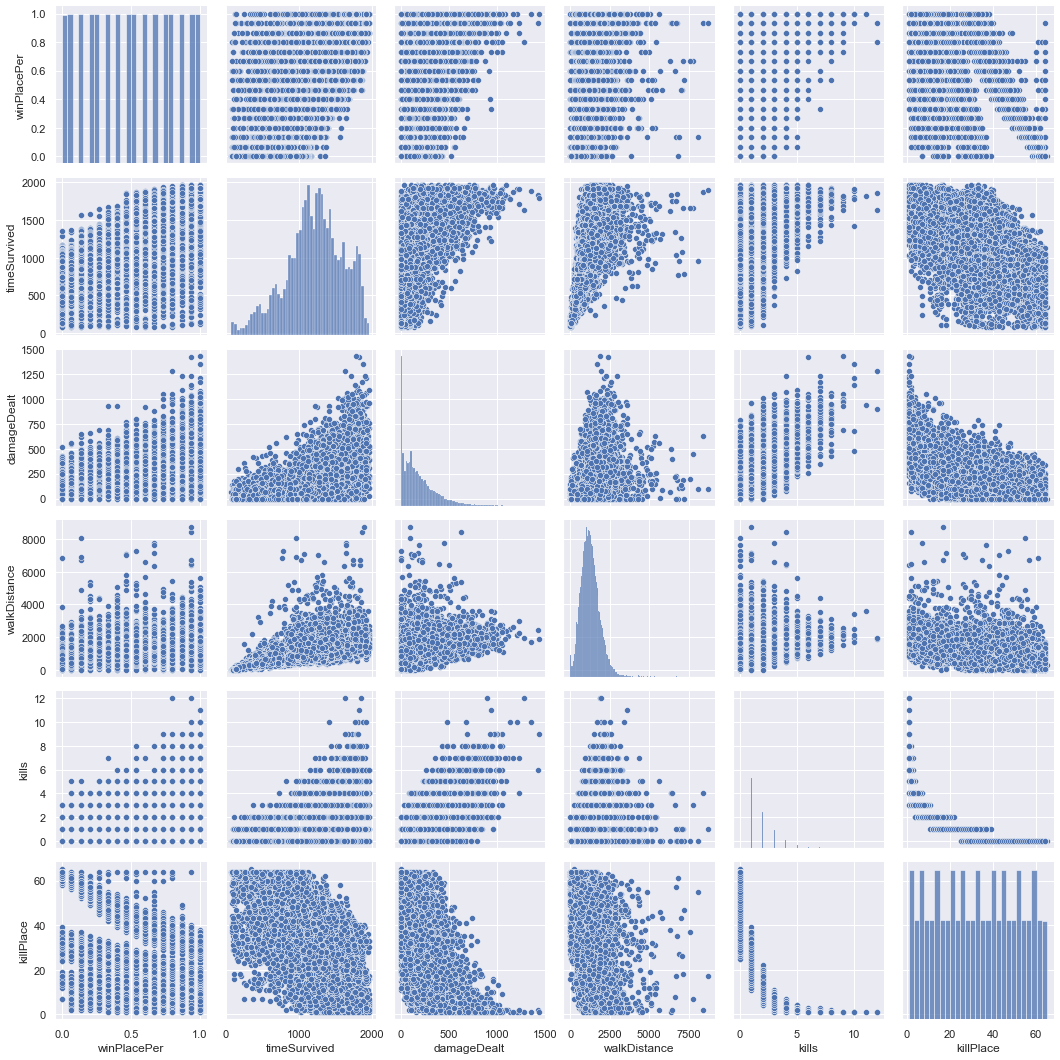

In [31]:
sns.set()
cols = ['winPlacePer', 'timeSurvived', 'damageDealt', 'walkDistance', 'kills', 'killPlace']
sns.pairplot(df[cols], size = 2.5)
plt.show()

In [32]:
# df['playersJoined'] = 60
# df['killsNorm'] = df['kills']*((100-df['playersJoined'])/100 + 1)
# df['damageDealtNorm'] = df['damageDealt']*((100-df['playersJoined'])/100 + 1)
# df[['playersJoined', 'kills', 'killsNorm', 'damageDealt', 'damageDealtNorm']][1:10]

In [33]:
# df['healsAndBoosts'] = df['heals']+df['boosts']
# df['totalDistance'] = df['walkDistance']+df['rideDistance']+df['swimDistance']

In [34]:
# df['boostsPerWalkDistance'] = df['boosts']/(df['walkDistance']+1) #The +1 is to avoid infinity, because there are entries where boosts>0 and walkDistance=0. Strange.
# df['boostsPerWalkDistance'].fillna(0, inplace=True)
# df['healsPerWalkDistance'] = df['heals']/(df['walkDistance']+1) #The +1 is to avoid infinity, because there are entries where heals>0 and walkDistance=0. Strange.
# df['healsPerWalkDistance'].fillna(0, inplace=True)
# df['healsAndBoostsPerWalkDistance'] = df['healsAndBoosts']/(df['walkDistance']+1) #The +1 is to avoid infinity.
# df['healsAndBoostsPerWalkDistance'].fillna(0, inplace=True)
# df[['walkDistance', 'boosts', 'boostsPerWalkDistance' ,'heals',  'healsPerWalkDistance', 'healsAndBoosts', 'healsAndBoostsPerWalkDistance']][40:45]

In [35]:
# df['killsPerWalkDistance'] = df['kills']/(df['walkDistance']+1) #The +1 is to avoid infinity, because there are entries where kills>0 and walkDistance=0. Strange.
# df['killsPerWalkDistance'].fillna(0, inplace=True)
# df[['kills', 'walkDistance', 'rideDistance', 'killsPerWalkDistance', 'winPlacePer']].sort_values(by='killsPerWalkDistance').tail(10)

In [36]:
# df['team'] = 4

In [37]:
# df.head()

In [38]:
# df.to_csv('EDA.csv', index=False)